# Klimamodellierung - Wie man das Klima der Zukunft vorhersagen kann

Wie wird das Klima in 50 Jahren aussehen? Werden die Temperaturen weiter steigen? Wie stark werden die Eisschilde schmelzen oder extreme Wetterereignisse zunehmen?<br>

Solche Fragen lassen sich nicht durch bloßes Beobachten beantworten - dafür braucht man Klimamodelle. Ein Klimamodell ist ein Computermodell, das mithilfe von physikalischen, chemischen und mathematischen Gleichungen beschreibt, wie sich das Klima auf der Erde entwickelt. Dabei fließen viele Faktoren ein, wie Sonnenstrahlung, CO₂-Konzentration, Wolkenbildung oder Meeresströmungen.<br>

Auch wenn diese Modelle sehr komplex sind, steckt hinter ihnen eine einfache Grundidee: Man nimmt bekannte Daten über die Erde heute und rechnet Schritt für Schritt voraus, wie sich bestimmte Werte verändern - ähnlich wie bei einem Wetterbericht, aber auf lange Sicht und global.

Klimamodelle können ziemlich kompliziert werden. Man könnte mehrere weitere Kurse damit füllen - ja gar ein ganzes Studium.

Ich möchte dir dennoch erste Einblicke in einfache Ideen geben und wie man diese mit Python darstellen kann:

# Wie warm wäre es ohne Treibhausgase?

Es gibt eine (relativ) einfache Formel, wie man die mittlere Temperatur der Erde berechnen kann. Diese Variante **vernachlässigt den Treibhauseffekt**!

Es berücksichtigt nur den Albedo-Effekt und die Solarkonstante

Weiterführende Informationen:
- https://mscm.dkrz.de/overview_i18n.html?locale=DE
- https://lehrerfortbildung-bw.de/u_matnatech/imp/gym/bp2016/fb2/p02_euw/1_hintergrund/2_gang/6_szenarien/
- https://www.umweltbundesamt.de/themen/klima-energie/klimawandel/klima-treibhauseffekt#die-sonne-und-das-klima
- https://users.monash.edu.au/~dietmard/teaching/GREB.lecture.notes.pdf


**Was ist Albedo?**
> Das Maß für die Rückstrahlung von Sonnenlicht.
0 = alles wird absorbiert, 1 = alles wird reflektiert.

**Was ist die Solarkonstante?**
> Die Menge an Sonnenenergie, die auf 1 m² der Erde trifft (ca. 1361 W/m²).

**Wie berechnen wir die Temperatur?**
> Mit dem Strahlungsgleichgewicht:

\begin{equation}
T = \left( \frac{(1-A)\cdot S}{4 \cdot \sigma} \right)^{1/4}
\end{equation}

> $A$: Albedo (Reflexionsgrad, z. B. 0.3) <br>
> $S$: Solarkonstante in W/m² (z. B. 1361) <br>
> $\sigma$: Stefan-Boltzmann-Konstante $\approx$ $5.67 \times 10^{-8}~W/(m^2\cdot K^4)$

In [1]:
# Stefan-Boltzmann-Konstante in W/(m²·K⁴)
sigma = 5.67e-8

In [2]:
# Benutzereingaben:
albedo = 0.3
S = 1366

In [3]:
# Berechnung der Temperatur in Kelvin
T = ((1 - albedo) * S / (4 * sigma)) ** 0.25

# Umrechnung in Grad Celsius
T_celsius = T - 273.15

In [4]:
# Ausgabe
print(f"\nTheoretische Temperatur der Erde:")
print(f"{T:.2f} Kelvin")
print(f"{T_celsius:.2f} °C")


Theoretische Temperatur der Erde:
254.82 Kelvin
-18.33 °C


## Weitere Albedo-Werte:


| Oberfläche | Albedo (%)                 |
|----------|------------------------------|
| Ozean    | 2-10                   |
| Wald    | 6-18                  |
| Städte    | 14-18                  |
| Vegetation    | 7-25                  |
| Boden    | 10-20                 |
| Grasland    | 16-20                |
| Sandwüste    | 35-45               |
| Wolken (dünn, dicke Stratuswolke)     | 30, 60-70               |
| Schnee (alt)    | 40-60               |
| Schnee (neu)    | 75-95               |


# Einfache Projektion von Temperatur anhand von CO₂-Werten

Wir nutzen echte historische CO₂-Daten und eine vereinfachte Formel, um zu schätzen, wie sich die Temperatur entwickelt, wenn CO₂ weiter steigt.

**Physikalischer Hintergrund (vereinfacht)**

Es gibt in der Klimaforschung eine Faustregel:
\begin{equation}
\Delta T = \lambda \cdot \Delta F
\end{equation}

> $\Delta T$: emperaturänderung <br>
> $\lambda$: Klimasensitivität (etwa 0.8 °C pro W/m²) <br>
> $\Delta F$: Strahlungsantrieb durch CO₂

Der Strahlungsantrieb durch CO₂ wird berechnet als:
\begin{equation}
\Delta F = 5.35 \cdot \ln \left( \frac{C}{C_0} \right)
\end{equation}

> $C$: aktuelle CO₂-Konzentration (ppm) <br>
> $C_0$: Ausgangskonzentration (z. B. 280 ppm vorindustriell)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Beispiel: historische CO₂-Daten (ppm)
df = pd.read_csv(
    "../02_Daten_lesen_und_verarbeiten/daten/co2_daily_mlo.csv",                              # Dateipfad
    comment='#',                                            # alle Zeilen mit # ignorieren
    names=['Jahr', 'Monat', 'Tag', 'Decimal_Datum', 'CO2_ppm']  # die Spaltennamen
)

In [33]:
df.head()

,Jahr,Monat,Tag,Decimal_Datum,CO2_ppm
0,1974,5,19,1974.3781,333.46
1,1974,5,20,1974.3808,333.64
2,1974,5,21,1974.3836,333.50
3,1974,5,22,1974.3863,333.21
4,1974,5,23,1974.3890,333.05


In [34]:
C0 = 280  # vorindustrieller Wert
lambda_klima = 0.8  # °C pro W/m²

# Berechne ΔF und ΔT
df["delta_F"] = 5.35 * np.log(df["CO2_ppm"] / C0)
df["delta_T"] = lambda_klima * df["delta_F"]

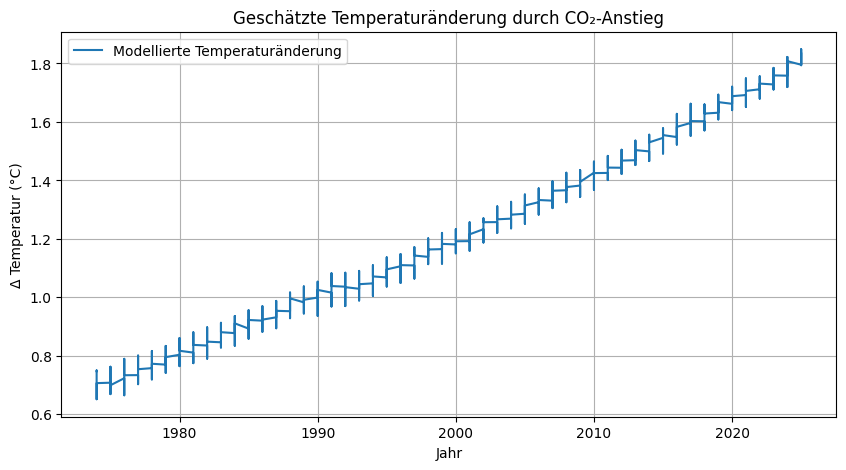

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(df["Jahr"], df["delta_T"], label="Modellierte Temperaturänderung")
plt.xlabel("Jahr")
plt.ylabel("Δ Temperatur (°C)")
plt.title("Geschätzte Temperaturänderung durch CO₂-Anstieg")
plt.grid(True)
plt.legend()
plt.show()

Vergleiche zu globaler, durchschnittlicher Temperatur

In [38]:
df_meas = pd.read_csv("GLB.Ts+dSST.csv", skiprows=1)
df_meas.head()
df_meas = df_meas.rename(columns={"Year": "Jahr", "J-D": "Temp_diff"})

# Nur Jahr und Temperaturdifferenz behalten
df_meas = df_meas[["Jahr", "Temp_diff"]]
df_meas = df_meas[df_meas["Temp_diff"] != "***"]  # Fehlwerte entfernen
df_meas["Temp_diff"] = df_meas["Temp_diff"].astype(float)


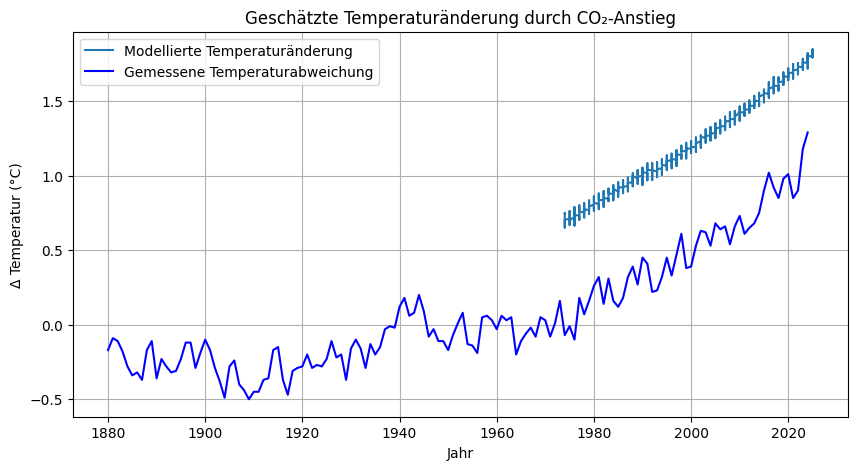

In [39]:
plt.figure(figsize=(10, 5))
plt.plot(df["Jahr"], df["delta_T"], label="Modellierte Temperaturänderung")
plt.plot(df_meas["Jahr"], df_meas["Temp_diff"], label="Gemessene Temperaturabweichung", color="blue")
plt.xlabel("Jahr")
plt.ylabel("Δ Temperatur (°C)")
plt.title("Geschätzte Temperaturänderung durch CO₂-Anstieg")
plt.grid(True)
plt.legend()
plt.show()